In [19]:
import pandas as pd
import os

In [21]:
os.getcwd()

'/Users/Curry/Desktop'

In [70]:
movies = pd.read_csv('P4-Movie-Ratings.csv')

In [71]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [72]:
len(movies)

559

In [73]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [74]:
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillions', 'Year']

In [75]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [76]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null object
Genre             559 non-null object
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [77]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [78]:
movies['Film']=movies['Film'].astype('category')

In [82]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null category
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [80]:
movies['Genre']=movies['Genre'].astype('category')
movies['Year']=movies['Year'].astype('category')

In [88]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [90]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


In [91]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [92]:
#jointplots

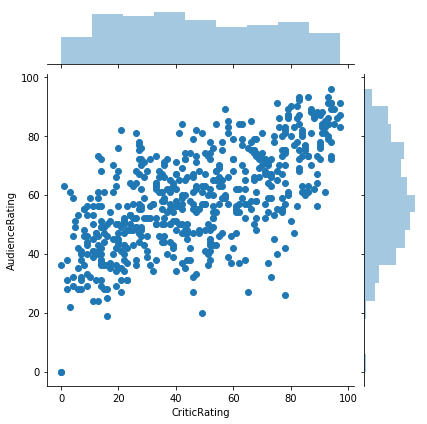

In [94]:
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating')

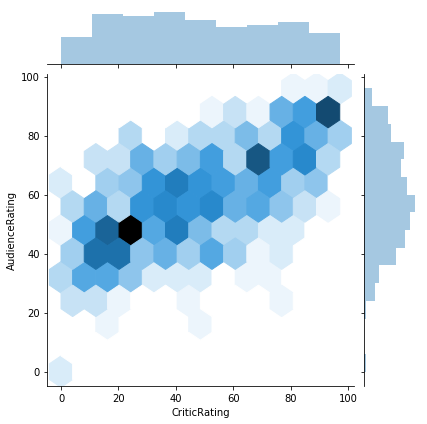

In [96]:
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating', kind='hex')

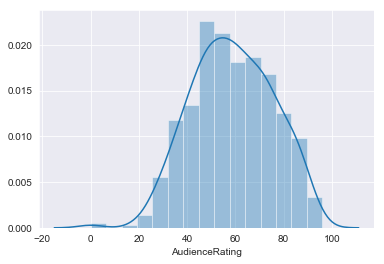

In [111]:
sns.set_style('darkgrid')
m1 = sns.distplot(movies.AudienceRating, bins=15)

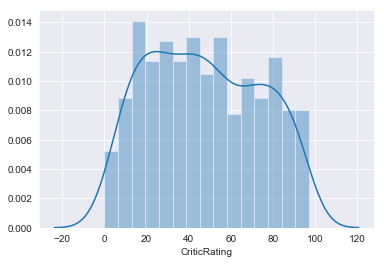

In [110]:

sns.set_style('darkgrid')
m2 = sns.distplot(movies.CriticRating, bins=15)

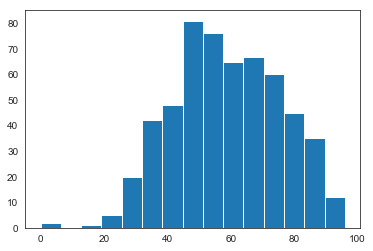

In [107]:
sns.set_style('white')
n1 = plt.hist(movies.AudienceRating, bins=15)

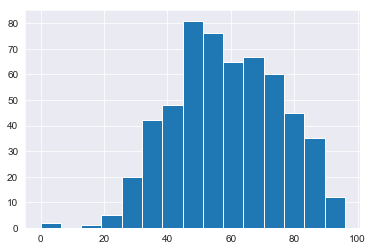

In [108]:
sns.set_style('darkgrid')
n1 = plt.hist(movies.AudienceRating, bins=15)

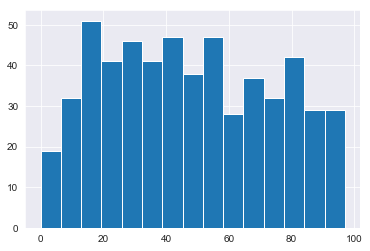

In [109]:
sns.set_style('darkgrid')
n1 = plt.hist(movies.CriticRating, bins=15)

In [112]:
#Stacked Histograms

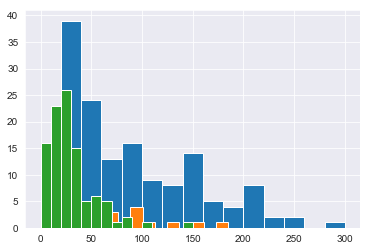

In [127]:
h1 = plt.hist(movies[movies.Genre == 'Action'].BudgetMillions, bins=15)
h1 = plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillions, bins=15)
h1 = plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions, bins=15)
plt.show()

([array([ 9., 39., 24., 13., 16.,  9.,  8., 14.,  5.,  4.,  8.,  2.,  2.,
          0.,  1.]),
  array([48., 80., 35., 19., 18., 10.,  8., 15.,  5.,  4.,  8.,  2.,  2.,
          0.,  1.]),
  array([52., 94., 39., 24., 20., 14.,  9., 16.,  5.,  5.,  8.,  2.,  2.,
          0.,  1.])],
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.,
        220., 240., 260., 280., 300.]),
 <a list of 3 Lists of Patches objects>)

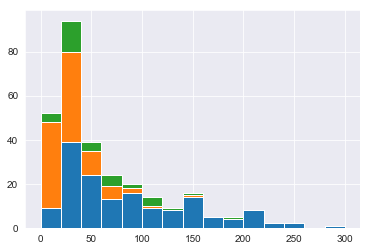

In [133]:


plt.hist([movies[movies.Genre == 'Action'].BudgetMillions, \
            movies[movies.Genre == 'Drama'].BudgetMillions, \
            movies[movies.Genre == 'Thriller'].BudgetMillions], \
         bins=15, stacked=True)

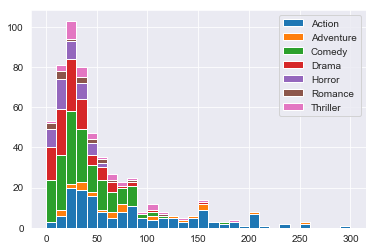

In [166]:
list1=list()
mylabels=list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)

h=plt.hist(list1,bins=30, stacked=True,rwidth=1,label= movies.Genre.cat.categories)
plt.legend()
plt.show()

In [159]:
mylabels

['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance', 'Thriller']

___

In [167]:
#KDE Plot

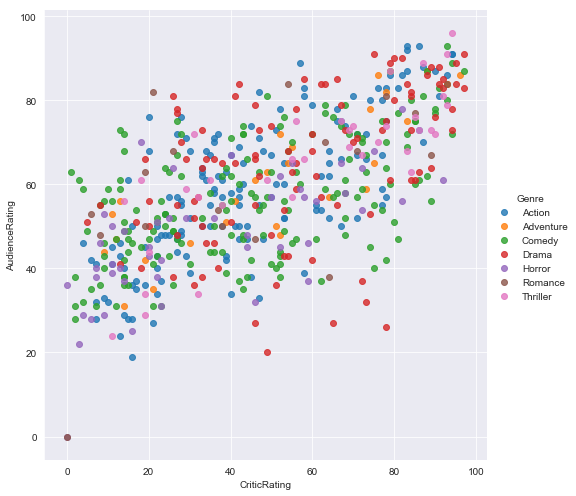

In [168]:
vis1 = sns.lmplot( data=movies, x='CriticRating', y='AudienceRating', fit_reg=False, hue='Genre',size=7, aspect=1)

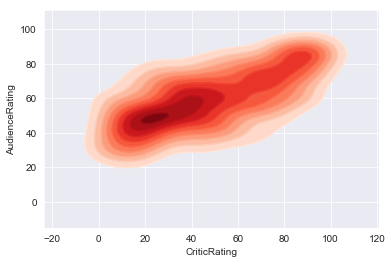

In [173]:
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True, shade_lowest=False, cmap='Reds')
k1b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap='Reds')